In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df=pd.read_csv('magic04.data')
df.head()

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.011  -8.2027  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887   9.8145   

    40.092  81.8828  g  
0   6.3609  205.261  g  
1  76.9600  256.788  g  
2  10.4490  116.737  g  
3   4.6480  356.462  g  
4   3.6130  238.098  g

In [ ]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3long','fM3Trans','fAlpha','fDist','class']

In [ ]:
df=pd.read_csv('magic04.data',names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class']=(df['class']=='g').astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
df.shape

(19020, 11)

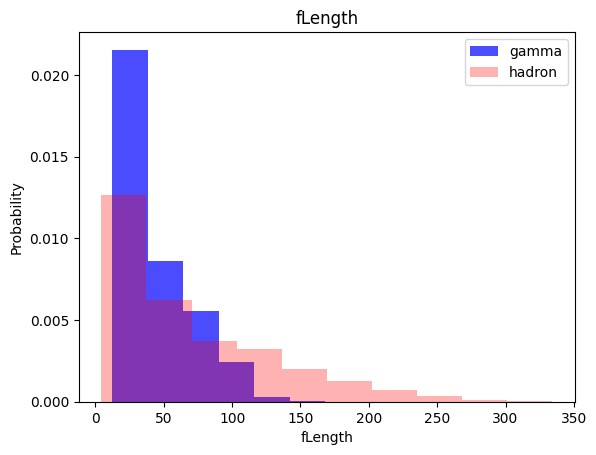

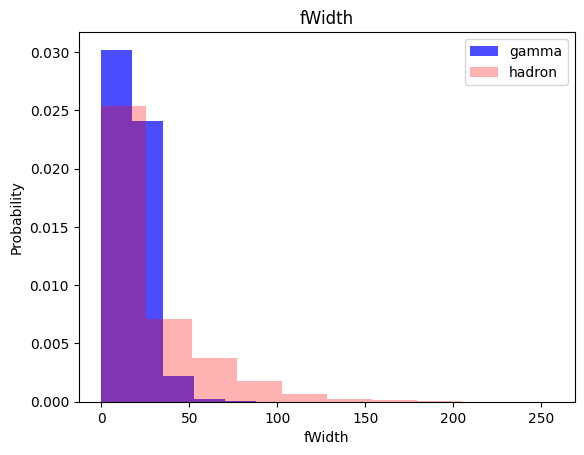

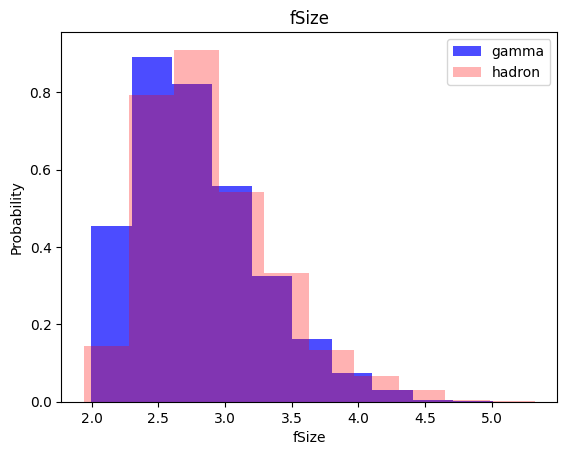

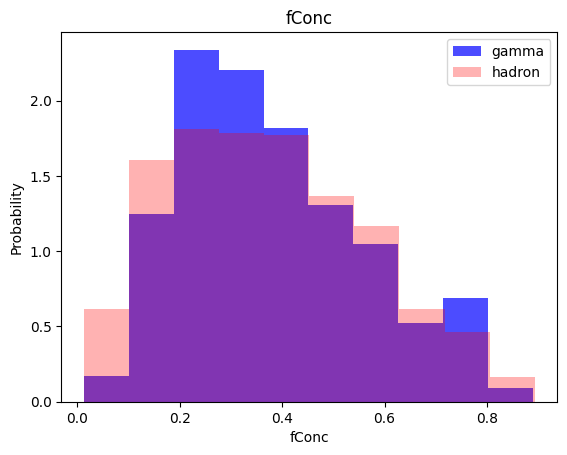

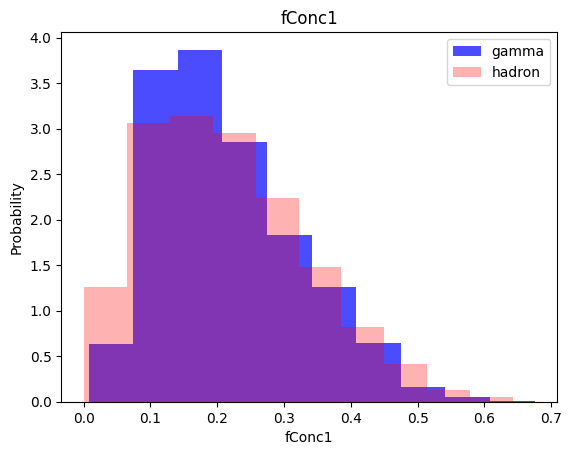

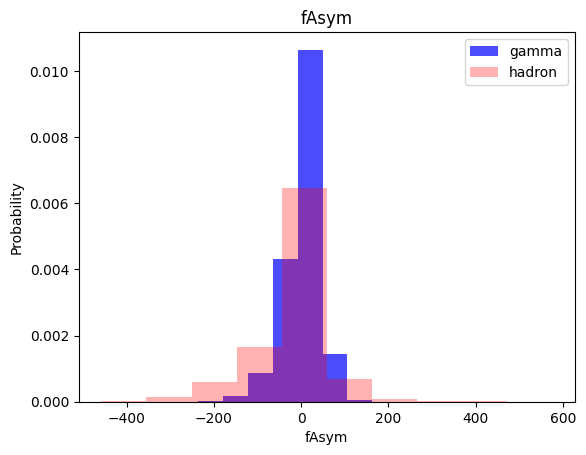

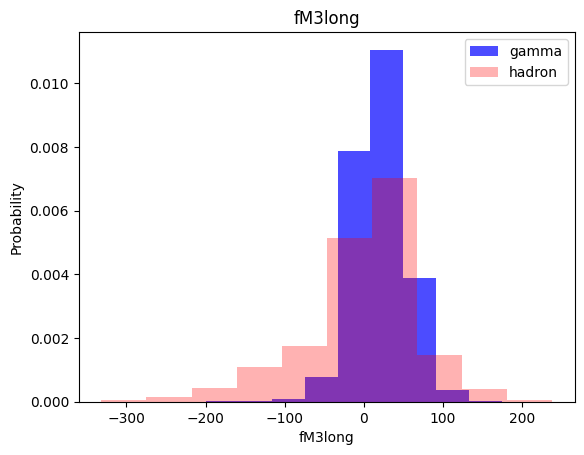

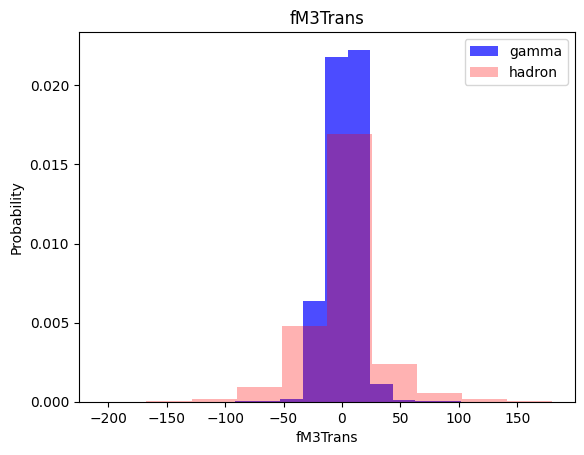

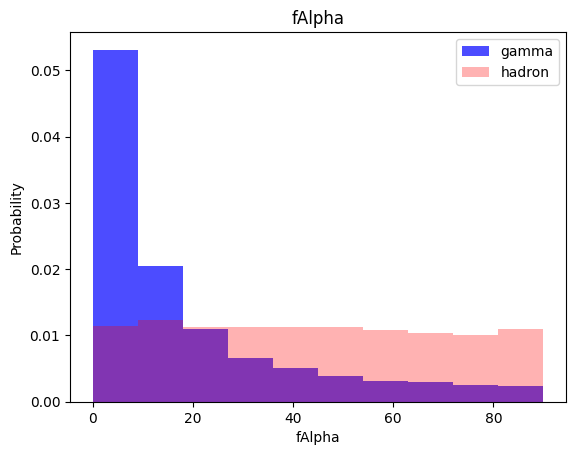

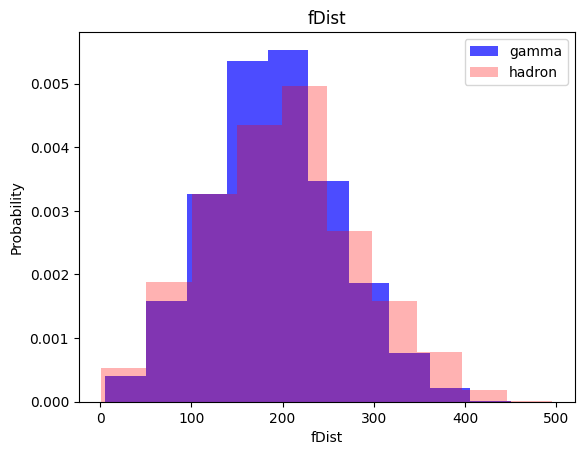

In [ ]:
for label in cols[:-1]: #all columns excdept the last one
  plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.3,density=True)
  plt.title(label);
  plt.xlabel(label);
  plt.ylabel('Probability');
  plt.legend();
  plt.show();


In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
#np.split(array, indices) splits an array (or DataFrame here) at the given indices.
#array = df.sample(frac=1)- means sample 100% of the rows, but in random order.
#indices = [int(0.6 * len(df)), int(0.8 * len(df))] - Meaning: First split point: 60% of the length.
                                                              #Second split point: 80% of the length.

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values #all column except last one
  y=dataframe[dataframe.columns[-1]].values #last column

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y) #to oversample the dataset so that the number of data for h n g are similar

  data=np.hstack((x,np.reshape(y,(-1,1)))) #horizontally stacks features and label., #turns 1D y into a 2D column.

  return data,x,y



In [ ]:
#train[train['class']==1].shape #gamma

In [ ]:
#train[train['class']==0].shape #hadron

In [ ]:
train,train_x,train_y=scale_dataset(train,oversample=True)

In [ ]:
len(train_x )#gamma

14858

In [ ]:
len(train_y==0)

14848

In [ ]:
len(train_y)

14962

In [ ]:
sum(train_y==1)

np.int64(7457)

In [ ]:
sum(train_y==0)

np.int64(7457)

In [ ]:
train,train_x,train_y=scale_dataset(train,oversample=True)
valid,valid_x,valid_y=scale_dataset(valid,oversample=False)
test,test_x,test_y=scale_dataset(test,oversample=False)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred_y=knn_model.predict(test_x)

In [ ]:
pred_y

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
print(classification_report(test_y,pred_y)) #k=1

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1345
           1       0.86      0.85      0.86      2459

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1345
           1       0.86      0.85      0.86      2459

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model=nb_model.fit(train_x,train_y)

In [ ]:
nb_pred_y=nb_model.predict(test_x)

In [ ]:
print(classification_report(test_y,nb_pred_y))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1345
           1       0.73      0.90      0.81      2459

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr_model=LogisticRegression()
logr_model=logr_model.fit(train_x,train_y)

In [ ]:
logr_pred=logr_model.predict(test_x)

In [ ]:
print(classification_report(test_y,logr_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1345
           1       0.84      0.82      0.83      2459

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model= SVC()
svm_model=svm_model.fit(train_x,train_y)

In [ ]:
svm_pred=svm_model.predict(test_x)

In [ ]:
print(classification_report(test_y,svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1345
           1       0.89      0.88      0.88      2459

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



## Neural Network

In [ ]:
import tensorflow as tf


In [ ]:
def plot_model(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Aaccuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()


In [ ]:
nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)), #first layer with 32 nodes having relu activation function with input shape being 1 or 0
    tf.keras.layers.Dense(32,activation='relu'), #Second layer
    tf.keras.layers.Dense(1,activation='sigmoid') #final layer having one node with sigmoid activation function
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
# Adam= learning rate
# Epoch should be chosen with care cuz too much might cause overfitting

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=nn_model.fit(
    train_x,
    train_y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
    )

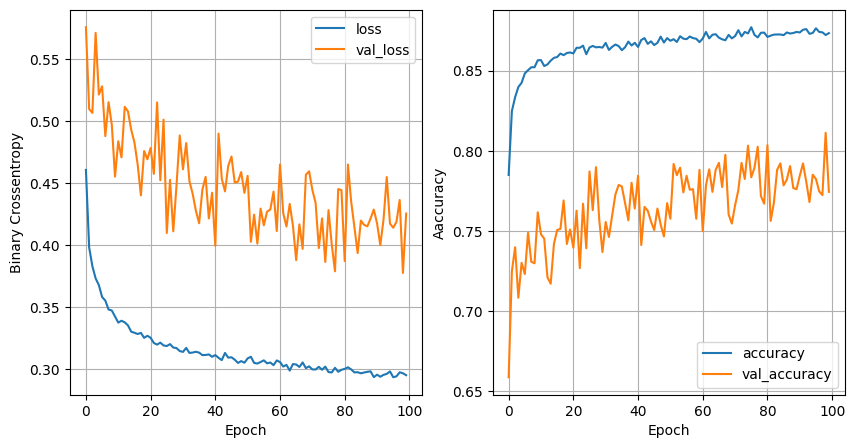

In [ ]:
plot_model(history)

In [ ]:
def train_model(train_x,train_y,num_nodes,dropout_rate,learning_rate,batch_size,epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)), #first layer with 32 nodes having relu activation function with input shape being 1 or 0
      tf.keras.layers.Dropout(dropout_rate), #drop out rate.
      tf.keras.layers.Dense(num_nodes,activation='relu'), #Second layer
      tf.keras.layers.Dropout(dropout_rate), #drop out rate.
      tf.keras.layers.Dense(1,activation='sigmoid') #final layer having one node with sigmoid activation function
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
  # Adam= learning rate
  # Epoch should be chosen with care cuz too much might cause overfitting
  history=nn_model.fit(
    train_x,
    train_y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=0
  )
  return nn_model,history

16 nodes ,dropout 0, learning rate 0.01, batch size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


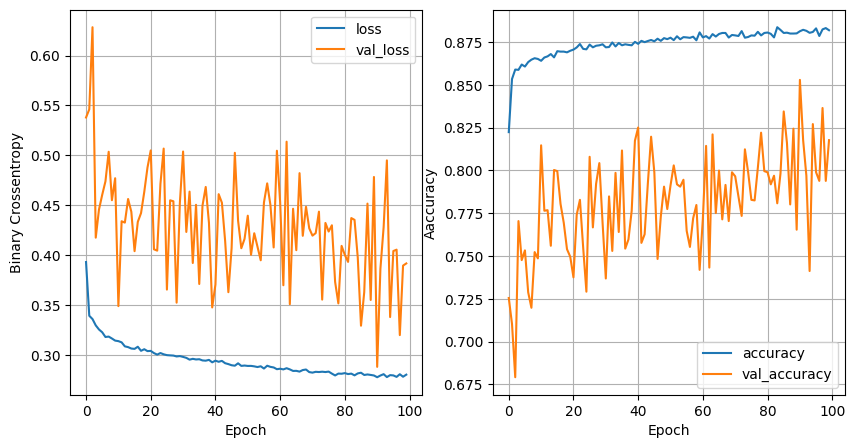

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8639 - loss: 0.3681
16 nodes ,dropout 0, learning rate 0.01, batch size 64


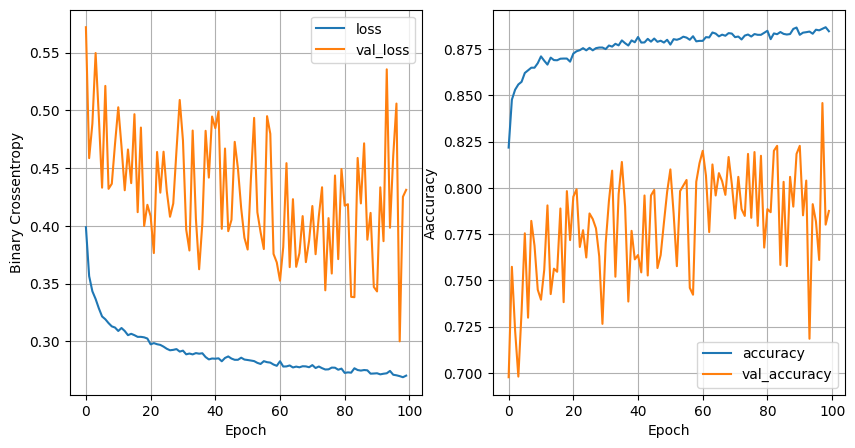

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8703 - loss: 0.3484
16 nodes ,dropout 0, learning rate 0.01, batch size 128


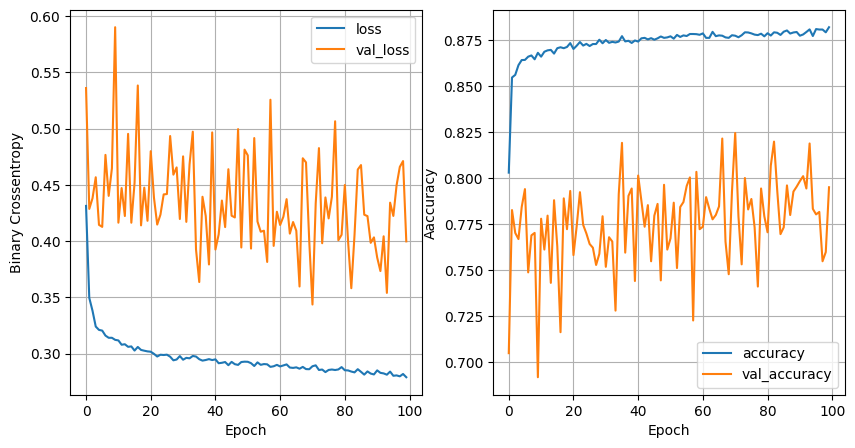

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8699 - loss: 0.3248
16 nodes ,dropout 0, learning rate 0.005, batch size 32


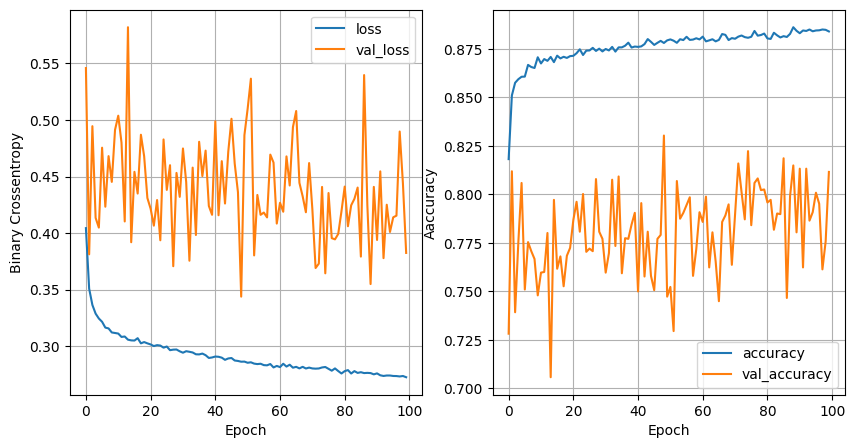

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8665 - loss: 0.3446
16 nodes ,dropout 0, learning rate 0.005, batch size 64


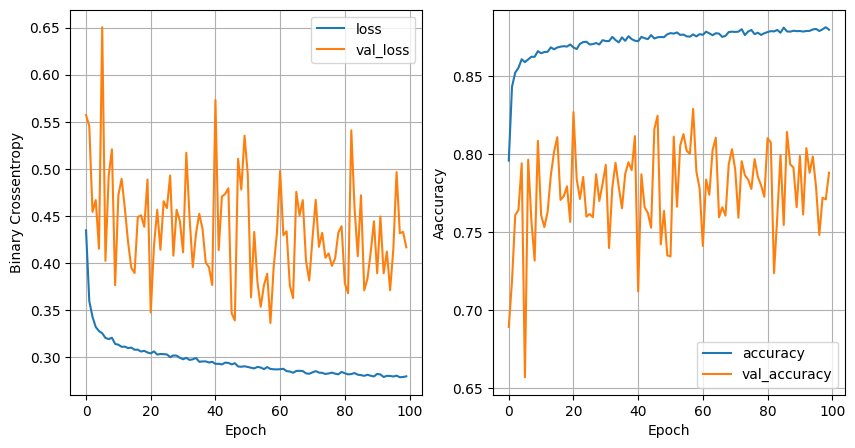

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.3249
16 nodes ,dropout 0, learning rate 0.005, batch size 128


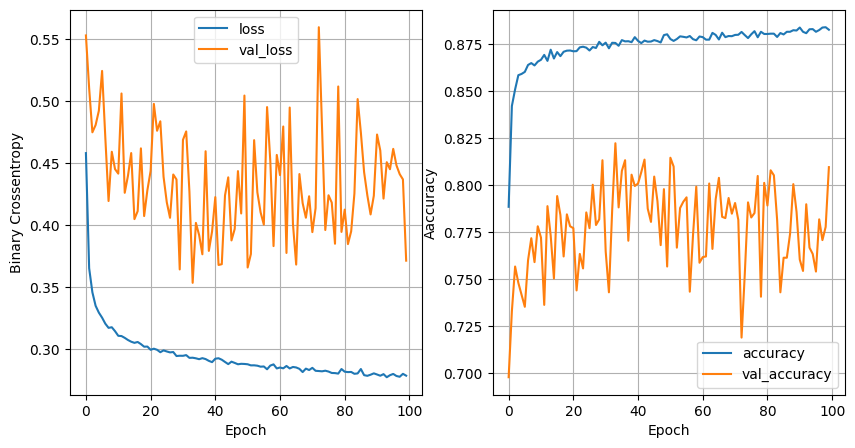

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8731 - loss: 0.3282
16 nodes ,dropout 0, learning rate 0.001, batch size 32


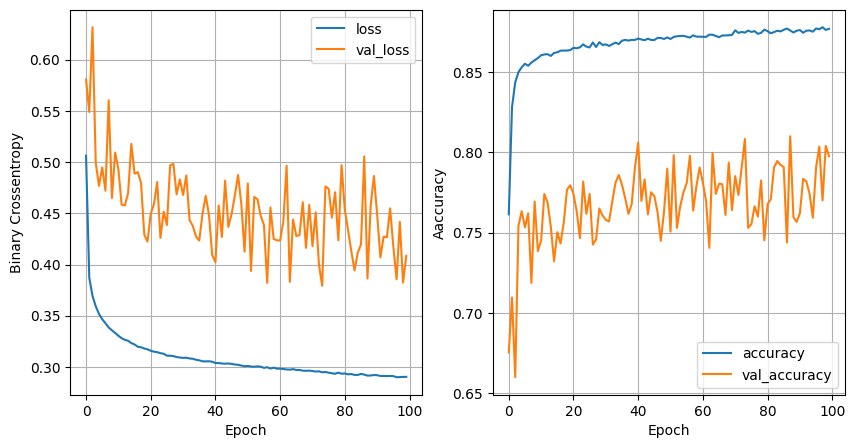

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8761 - loss: 0.3197
16 nodes ,dropout 0, learning rate 0.001, batch size 64


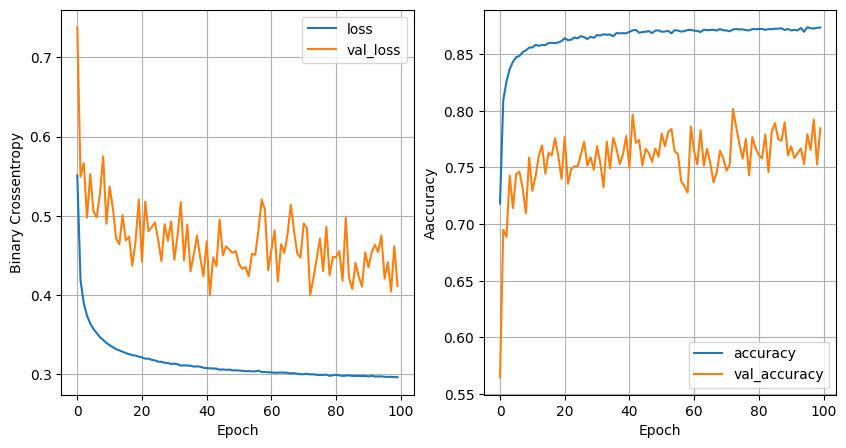

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8729 - loss: 0.3234
16 nodes ,dropout 0, learning rate 0.001, batch size 128


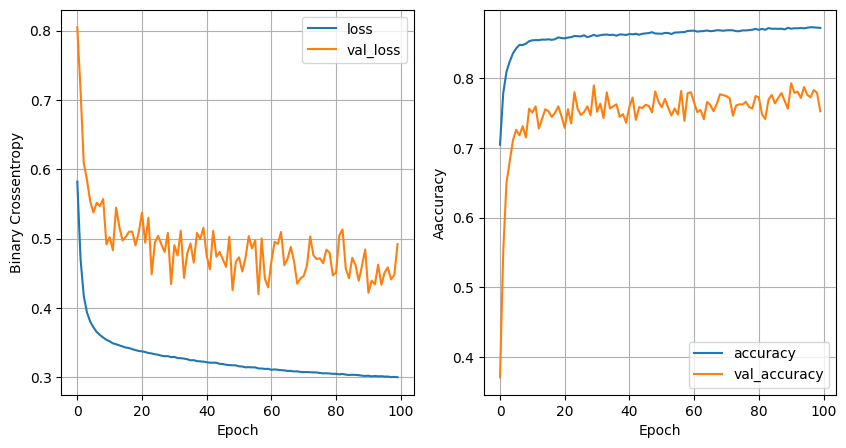

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8734 - loss: 0.3232
16 nodes ,dropout 0.2, learning rate 0.01, batch size 32


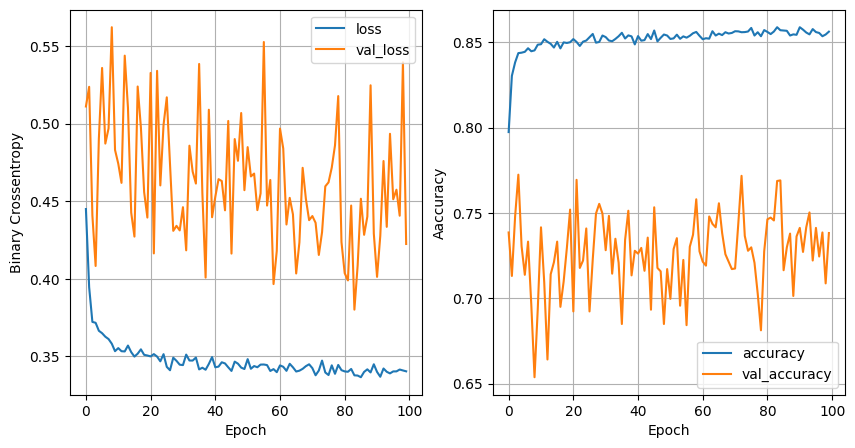

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8692 - loss: 0.3433
16 nodes ,dropout 0.2, learning rate 0.01, batch size 64


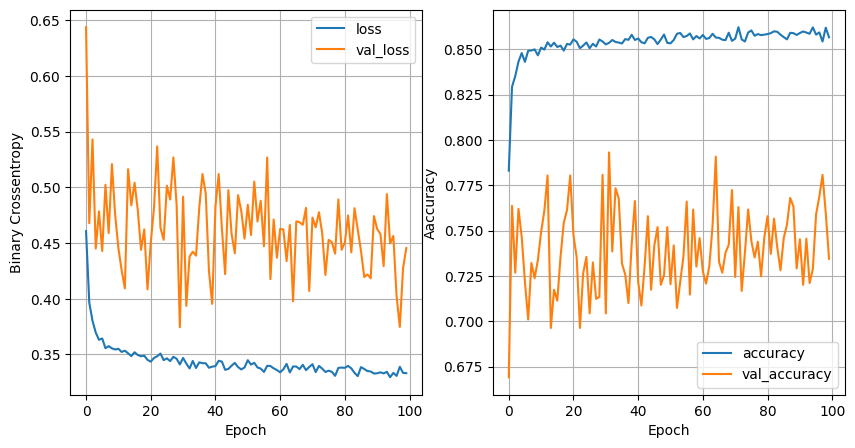

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8654 - loss: 0.3317
16 nodes ,dropout 0.2, learning rate 0.01, batch size 128


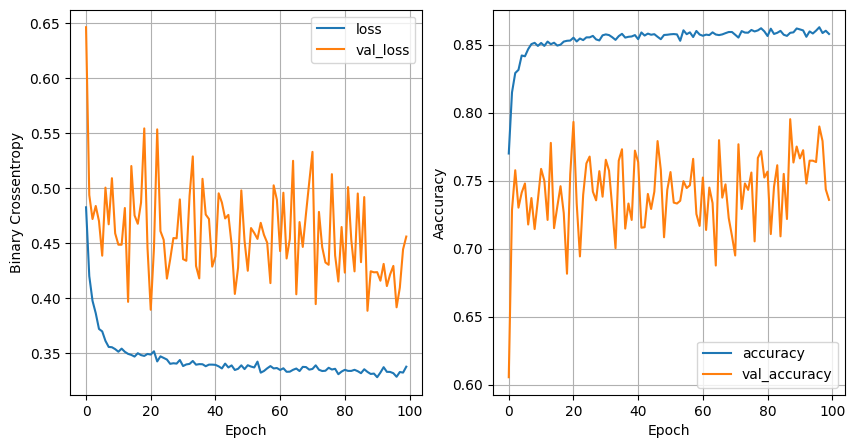

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8662 - loss: 0.3237
16 nodes ,dropout 0.2, learning rate 0.005, batch size 32


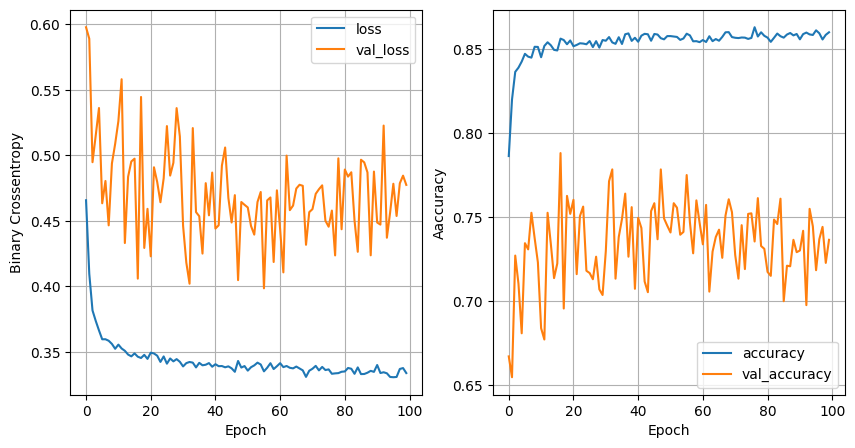

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8647 - loss: 0.3273
16 nodes ,dropout 0.2, learning rate 0.005, batch size 64


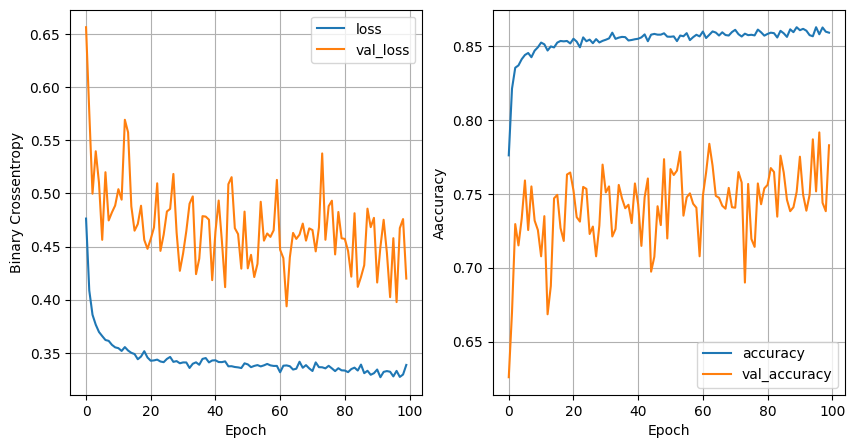

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8738 - loss: 0.3231
16 nodes ,dropout 0.2, learning rate 0.005, batch size 128


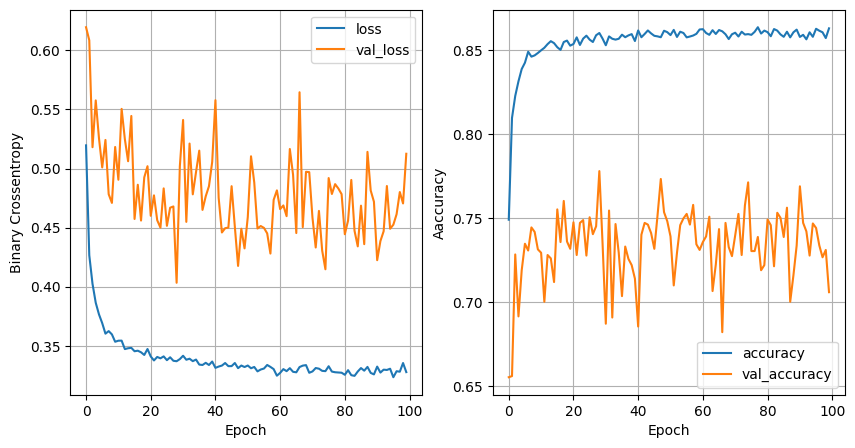

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8632 - loss: 0.3256
16 nodes ,dropout 0.2, learning rate 0.001, batch size 32


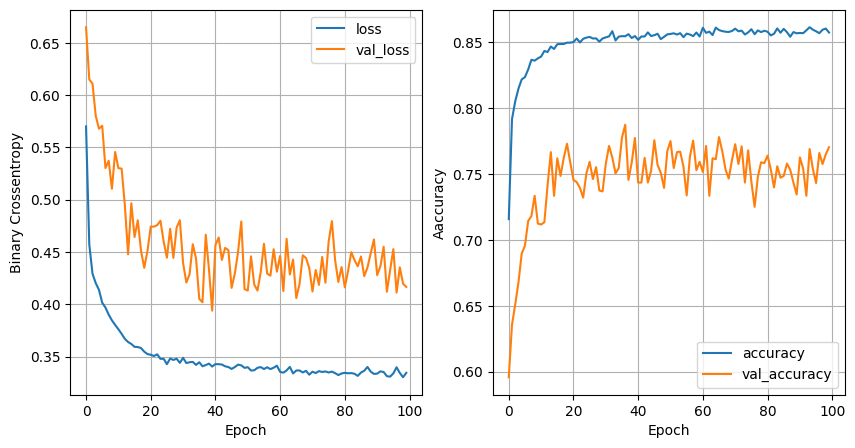

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8748 - loss: 0.3265
16 nodes ,dropout 0.2, learning rate 0.001, batch size 64


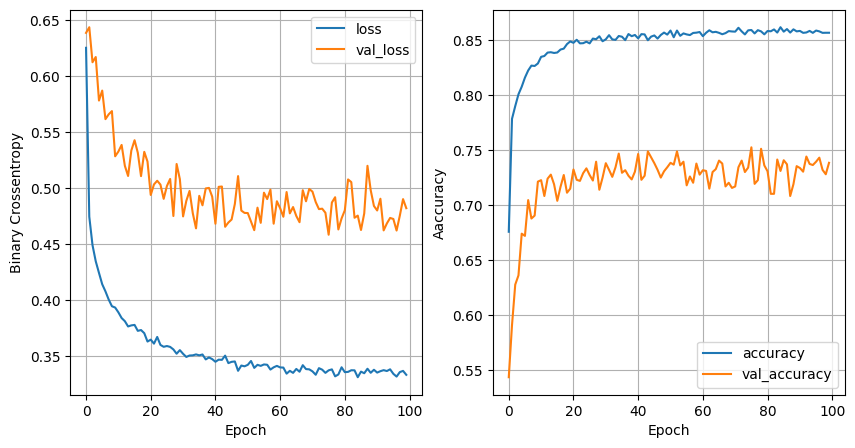

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8696 - loss: 0.3225
16 nodes ,dropout 0.2, learning rate 0.001, batch size 128


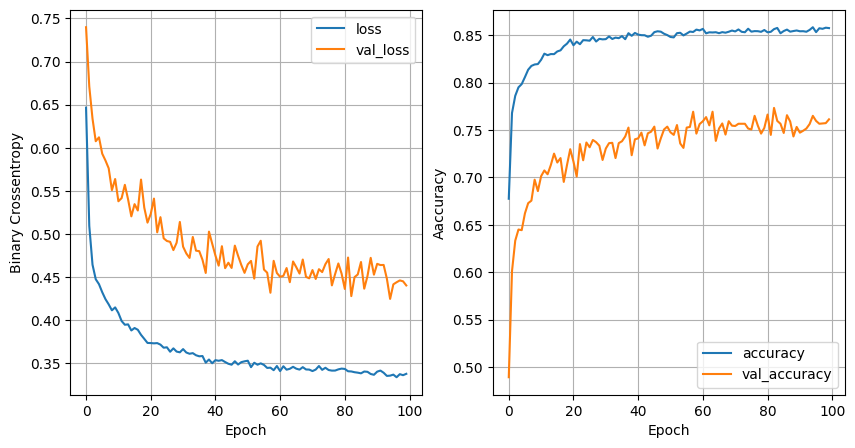

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8667 - loss: 0.3283
32 nodes ,dropout 0, learning rate 0.01, batch size 32


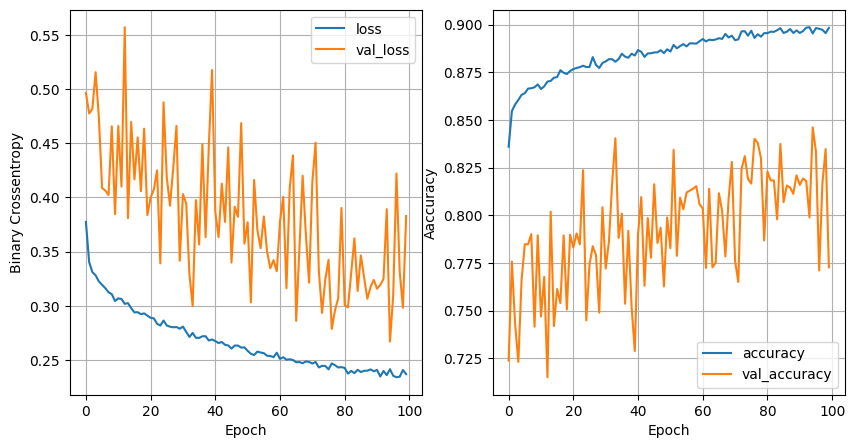

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8596 - loss: 0.4218
32 nodes ,dropout 0, learning rate 0.01, batch size 64


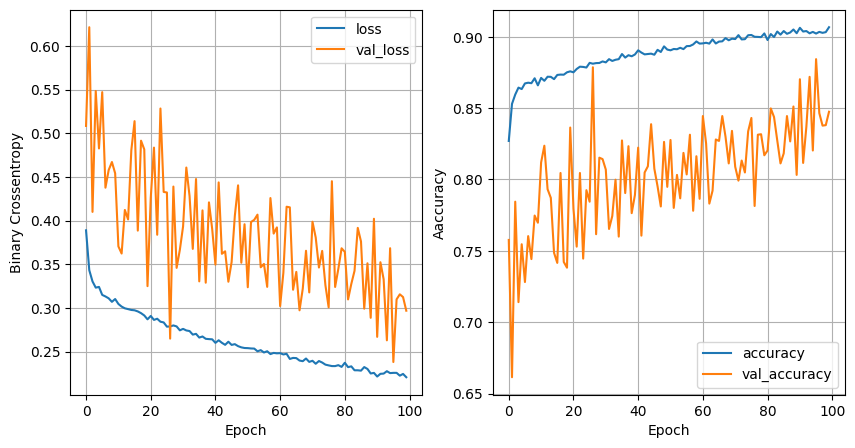

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.4289
32 nodes ,dropout 0, learning rate 0.01, batch size 128


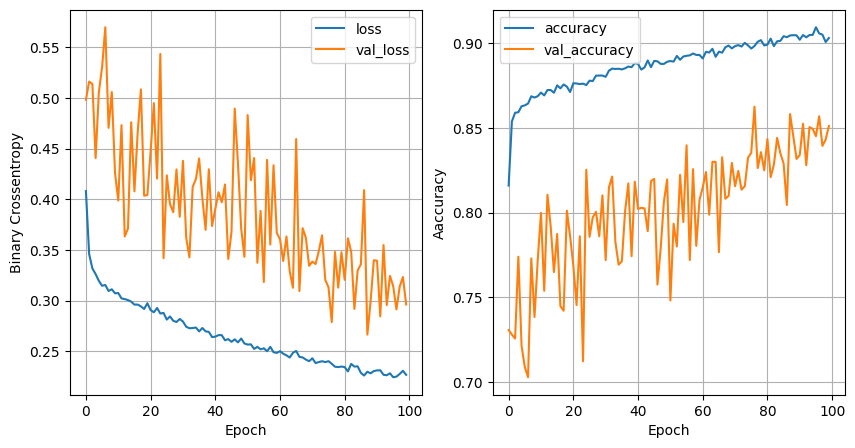

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8673 - loss: 0.3881
32 nodes ,dropout 0, learning rate 0.005, batch size 32


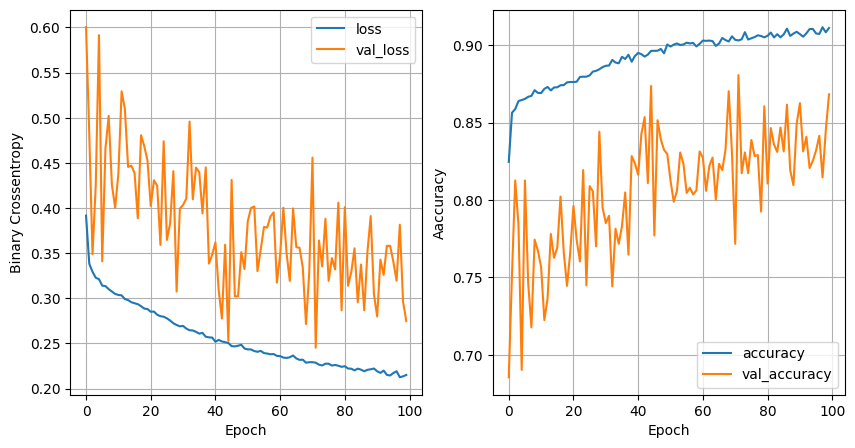

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.3873
32 nodes ,dropout 0, learning rate 0.005, batch size 64


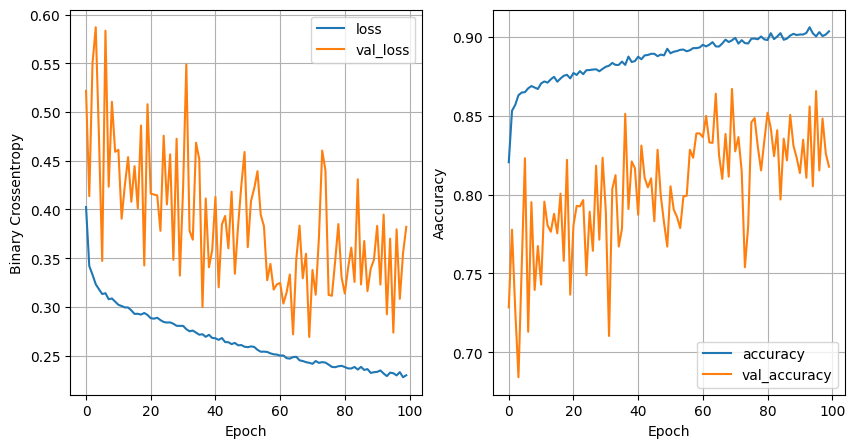

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8731 - loss: 0.3778
32 nodes ,dropout 0, learning rate 0.005, batch size 128


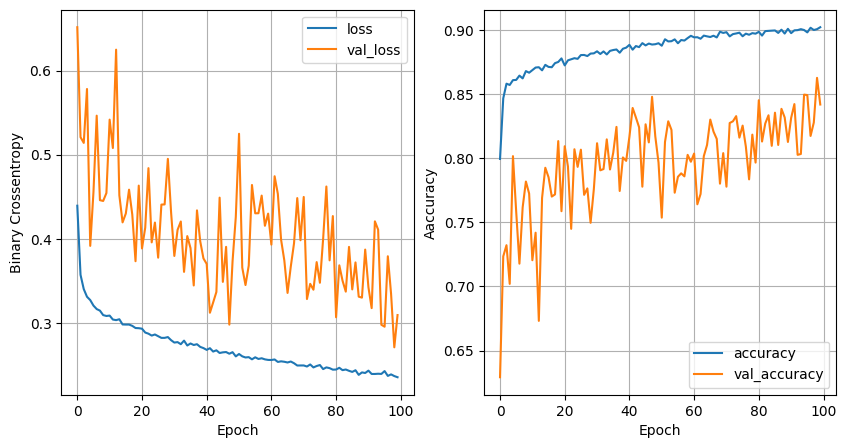

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8590 - loss: 0.3733
32 nodes ,dropout 0, learning rate 0.001, batch size 32


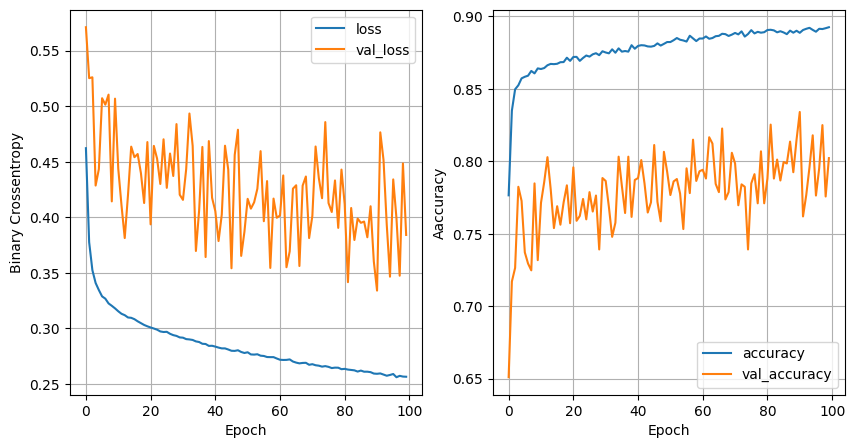

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8738 - loss: 0.3218
32 nodes ,dropout 0, learning rate 0.001, batch size 64


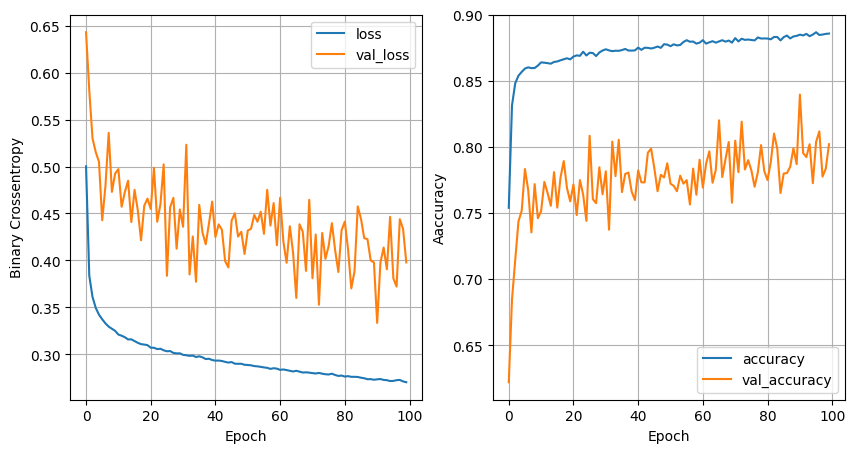

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8806 - loss: 0.3222
32 nodes ,dropout 0, learning rate 0.001, batch size 128


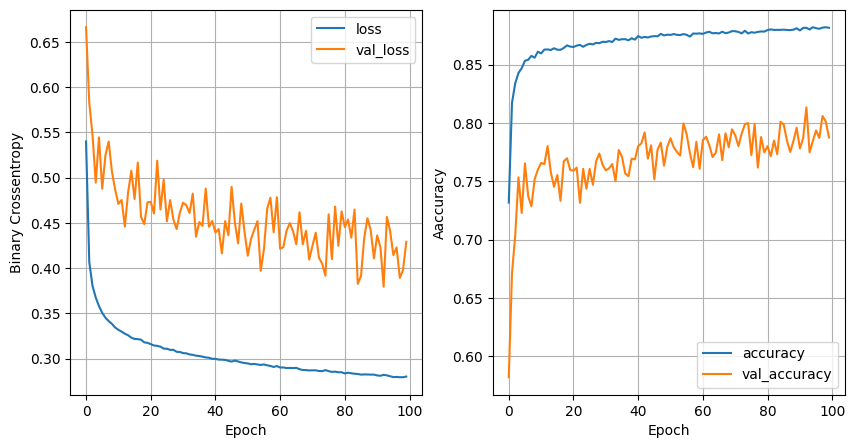

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8783 - loss: 0.3154
32 nodes ,dropout 0.2, learning rate 0.01, batch size 32


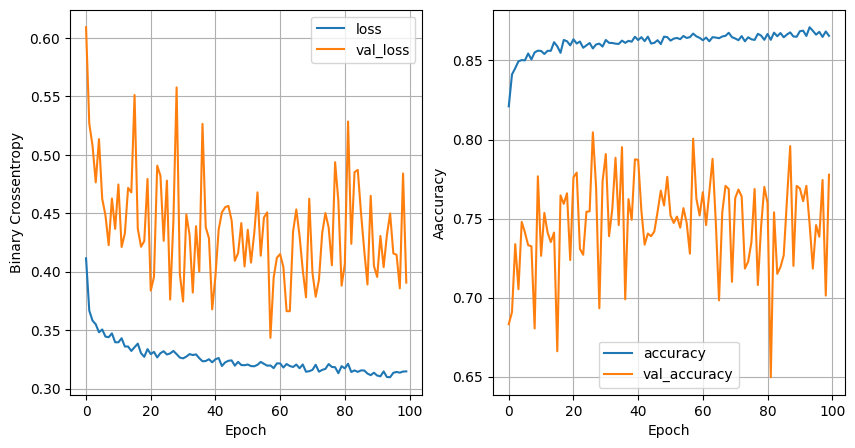

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8732 - loss: 0.3369
32 nodes ,dropout 0.2, learning rate 0.01, batch size 64


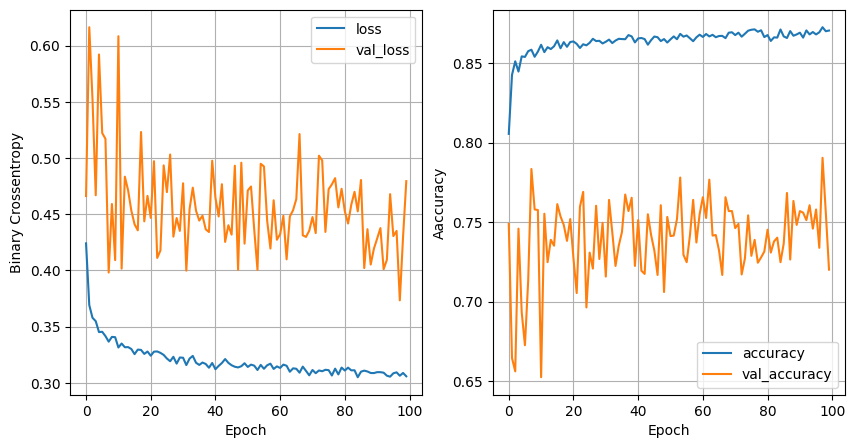

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8677 - loss: 0.3320
32 nodes ,dropout 0.2, learning rate 0.01, batch size 128


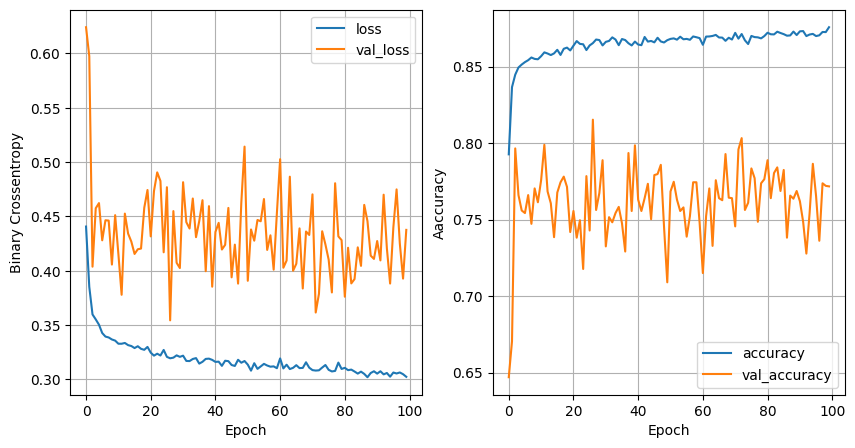

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8767 - loss: 0.3127
32 nodes ,dropout 0.2, learning rate 0.005, batch size 32


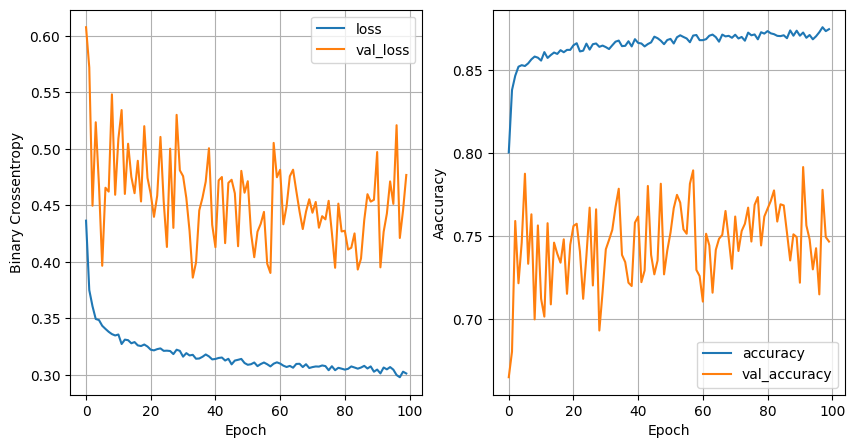

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8754 - loss: 0.3184
32 nodes ,dropout 0.2, learning rate 0.005, batch size 64


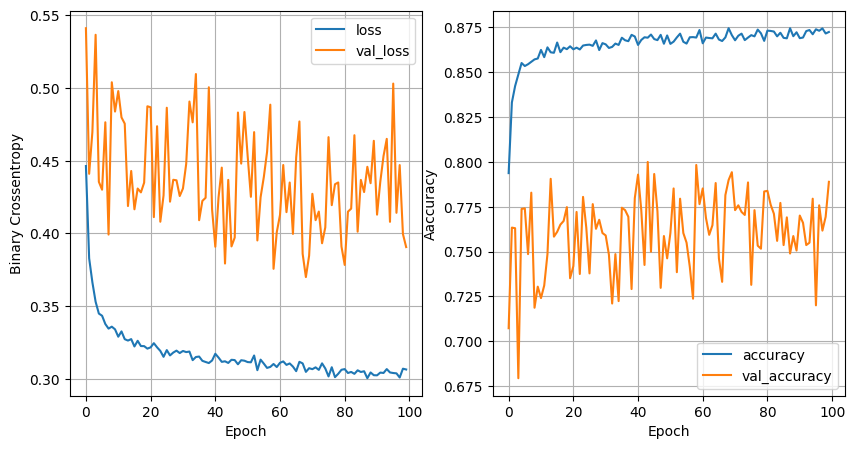

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8732 - loss: 0.3143
32 nodes ,dropout 0.2, learning rate 0.005, batch size 128


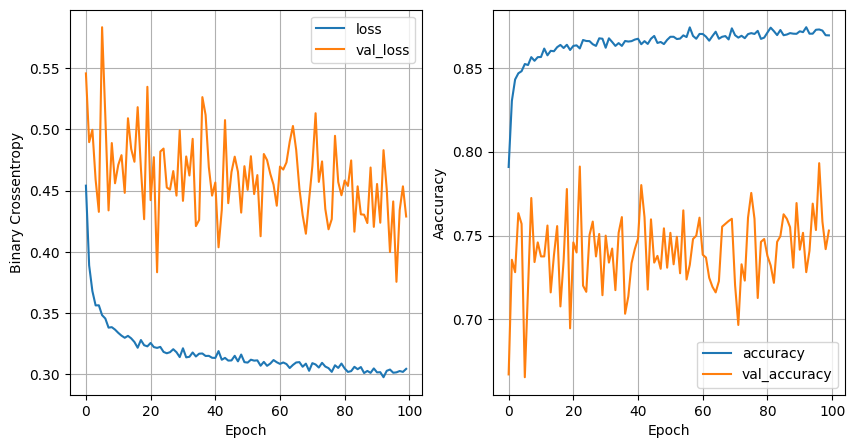

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8769 - loss: 0.3130
32 nodes ,dropout 0.2, learning rate 0.001, batch size 32


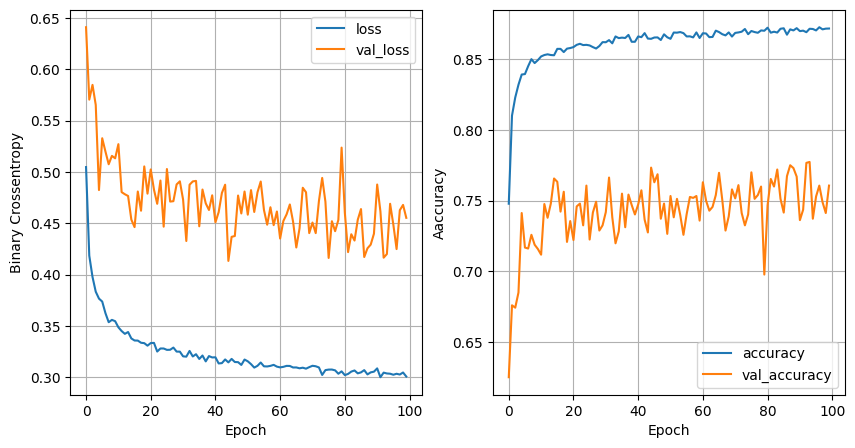

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8764 - loss: 0.3094
32 nodes ,dropout 0.2, learning rate 0.001, batch size 64


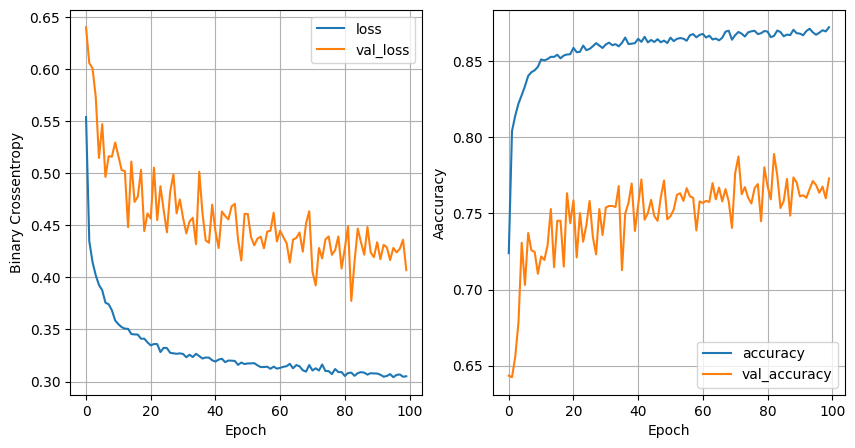

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8789 - loss: 0.3135
32 nodes ,dropout 0.2, learning rate 0.001, batch size 128


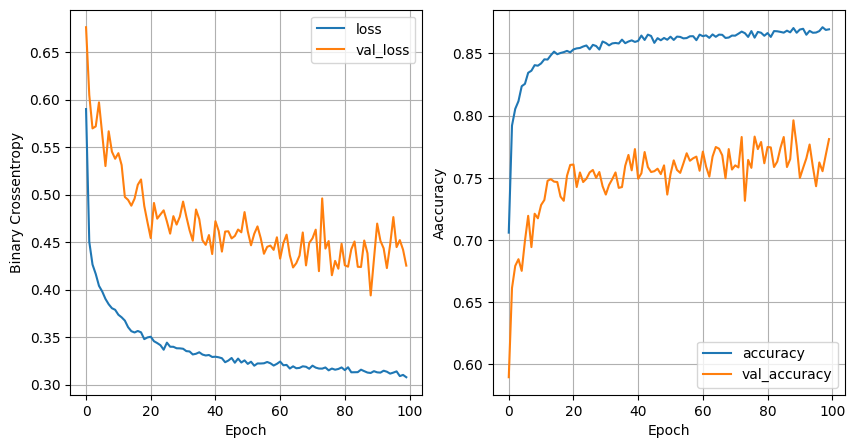

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8788 - loss: 0.3155
64 nodes ,dropout 0, learning rate 0.01, batch size 32


In [ ]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_rate in [0,0.2]:
    for learning_rate in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes ,dropout {dropout_rate}, learning rate {learning_rate}, batch size {batch_size}")
        model,history=train_model(train_x,train_y,num_nodes,dropout_rate,learning_rate,batch_size,epochs)
        plot_model(history)
        val_loss=model.evaluate(valid_x,valid_y)[0]
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

Next we will just look for the best model and see its accuary...

Neural networks are very powerful for classification but we need to understand which problem needs what model.